Training Mean Squared Error (MSE): 11005.592607748551
Testing Mean Squared Error (MSE): 15325.866105925666


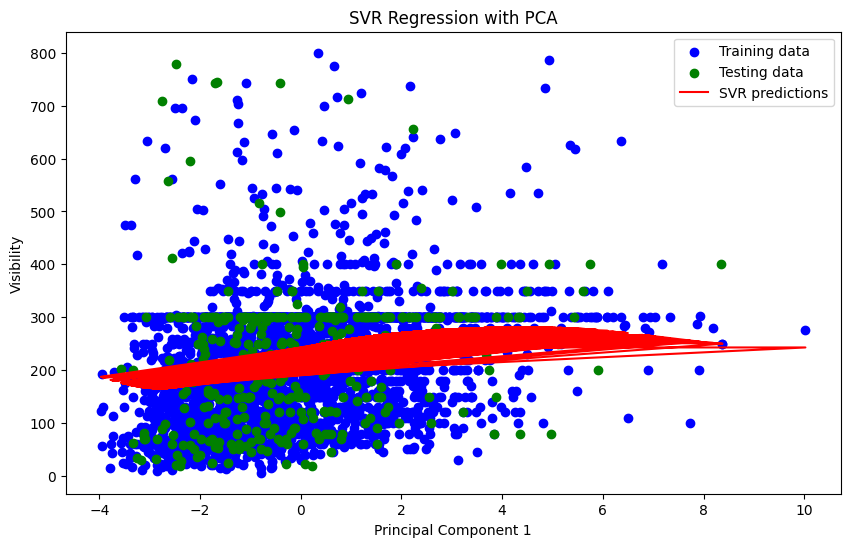

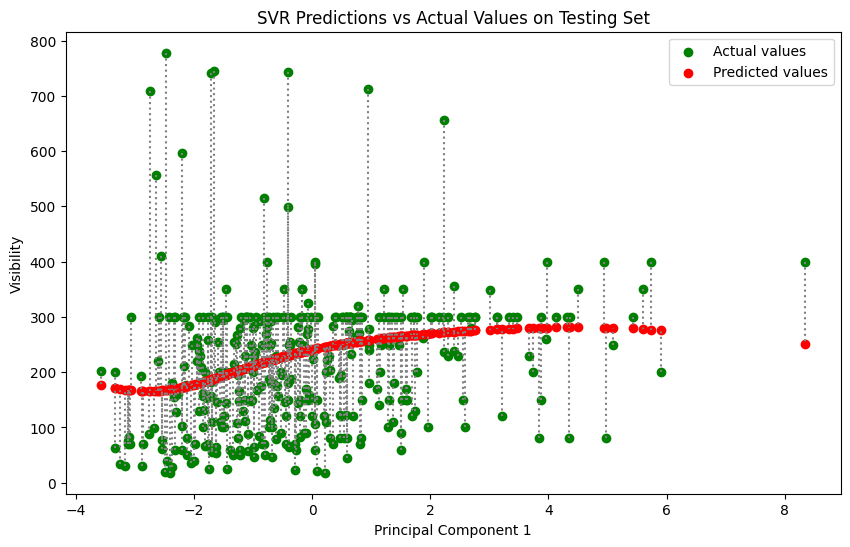

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 加载数据
file_path = 'high_correlation_data.xlsx'
data = pd.read_excel(file_path)

# 定义特征列和目标列
feature_columns = ['RELHUMIDITY', 'MINRELHUMIDITY', 'INSTANTWINDV', 'HEXMAXWINDV', 'WINDV10MS', 'MAXWINDV10MS', 'GRASSLANDMAXTEMP']
target_column = 'VISIBILITY'

# 提取特征和目标
X = data[feature_columns]
y = data[target_column]

# 标准化特征数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用PCA提取一个主成分
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, random_state=42)

# 初始化并训练SVR模型
svr_model = SVR()
svr_model.fit(X_train, y_train)

# 使用SVR模型进行预测
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

# 计算训练集和测试集的MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# 打印训练集和测试集的MSE
print(f'Training Mean Squared Error (MSE): {train_mse}')
print(f'Testing Mean Squared Error (MSE): {test_mse}')

# 绘制回归图像
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, y_train_pred, color='red', label='SVR predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Visibility')
plt.legend()
plt.title('SVR Regression with PCA')
plt.show()

# 绘制测试集预测与实际值的偏差
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual values')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted values')
for i in range(len(X_test)):
    plt.plot([X_test[i][0], X_test[i][0]], [y_test.iloc[i], y_test_pred[i]], color='gray', linestyle='dotted')
plt.xlabel('Principal Component 1')
plt.ylabel('Visibility')
plt.legend()
plt.title('SVR Predictions vs Actual Values on Testing Set')
plt.show()


Learned Decision Tree Model: DecisionTreeRegressor(random_state=42)
Average Mean Squared Error (MSE) on training set via 10-fold cross-validation: 21697.26764303483
Mean Squared Error (MSE) on testing set: 23786.72922252011


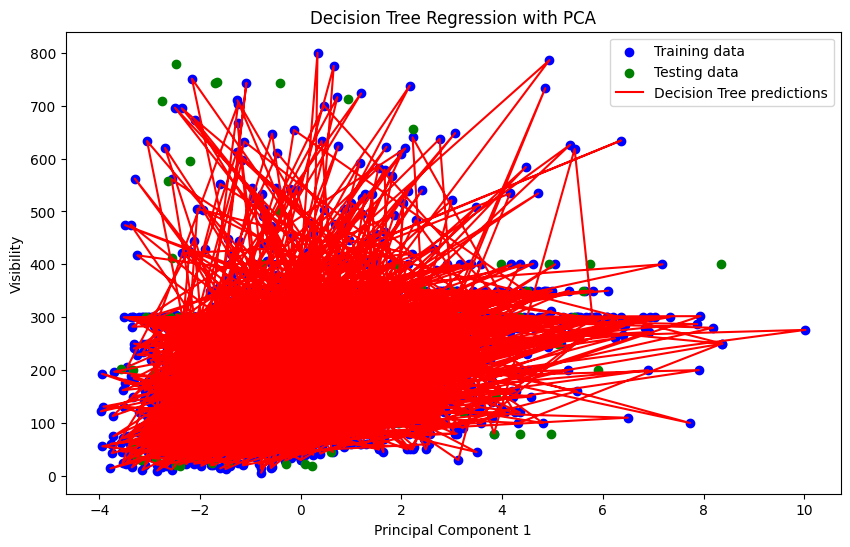

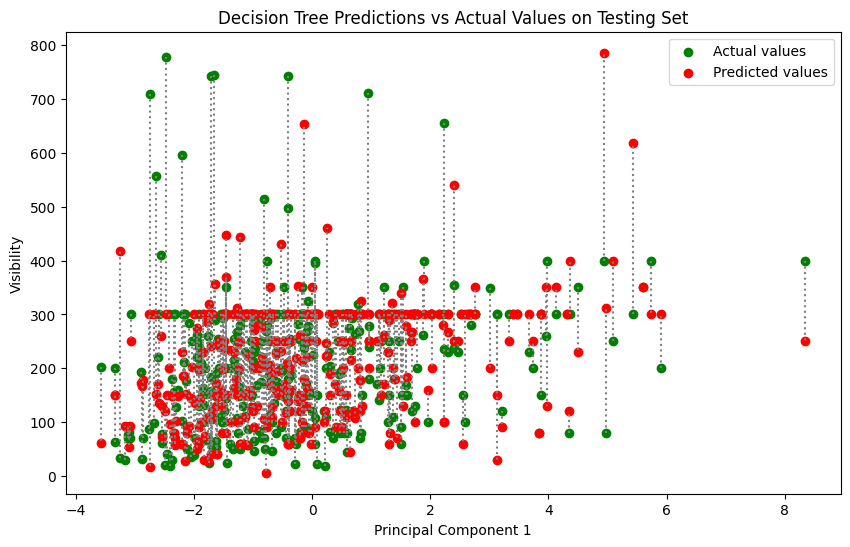

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset from the provided Excel file
file_path = 'high_correlation_data.xlsx'
data = pd.read_excel(file_path)

# Define the feature columns and target column
feature_columns = ['RELHUMIDITY', 'MINRELHUMIDITY', 'INSTANTWINDV', 'HEXMAXWINDV', 'WINDV10MS', 'MAXWINDV10MS', 'GRASSLANDMAXTEMP']
target_column = 'VISIBILITY'

# Extract features and target
X = data[feature_columns]
y = data[target_column]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Extract one principal component using PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split the data into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, random_state=42)

# Step 4: Train the Decision Tree Regressor model using the training set
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Step 5: Evaluate the model using 10-fold cross-validation on the training set and compute the average mean squared error (MSE)
mse_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
average_mse = -mse_scores.mean()

# Print the learned model and the average MSE
print(f'Learned Decision Tree Model: {tree_model}')
print(f'Average Mean Squared Error (MSE) on training set via 10-fold cross-validation: {average_mse}')

# Predict on the test set
y_test_pred = tree_model.predict(X_test)

# Calculate the MSE on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (MSE) on testing set: {test_mse}')

# Step 7: Plot the regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_train, tree_model.predict(X_train), color='red', label='Decision Tree predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Visibility')
plt.legend()
plt.title('Decision Tree Regression with PCA')
plt.show()

# Plot the deviation of predictions and actual values on the testing set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Actual values')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted values')
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [y_test.iloc[i], y_test_pred[i]], color='gray', linestyle='dotted')
plt.xlabel('Principal Component 1')
plt.ylabel('Visibility')
plt.legend()
plt.title('Decision Tree Predictions vs Actual Values on Testing Set')
plt.show()
